In [5]:
import pandas as pd

In [6]:
df_large = pd.read_csv('pairs.csv')

In [3]:
df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498292 entries, 0 to 498291
Columns: 305 entries, user to Friendship
dtypes: float64(302), int64(2), object(1)
memory usage: 1.1+ GB


In [4]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [34]:
oversample = RandomOverSampler(sampling_strategy=0.3)

In [7]:
y = df_large.iloc[:,2].values
X = df_large.iloc[:,154:305].values


In [26]:
X_over, y_over = oversample.fit_resample(X, y)
print(X_over.shape)

(707743, 151)


In [27]:
print(X.shape)

(498292, 151)


In [25]:
import os
import sys
import pandas as pd
import numpy as np
import csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [29]:
def logreg_analysis(model, X, y):
    kf = StratifiedKFold(n_splits=5)
    #maybe add interaction terms
    temp = []
    for train, test in kf.split(X, y):
        model.fit(X[train], y[train])
        y_pred = model.predict(X[test])
        temp.append(metrics.precision_score(y[test], y_pred, zero_division=0))
    return temp


In [30]:
def logreg_plot(X,y):
    C_set = [0.01, 0.1, 0.5, 1, 10, 100]
    fig, ax = plt.subplots()
    fig.suptitle('Precision of Logistic Regression Models')
    mean_score = []
    std_score = []
    for C in C_set:
        model_ridge = LogisticRegression(penalty = 'l2', solver = 'lbfgs', C=C, max_iter = 10000)
        score = logreg_analysis(model_ridge, X, y)
        mean_score.append(np.array(score).mean())
        std_score.append(np.array(score).std())

    ax.errorbar(C_set, mean_score, yerr = std_score, linewidth = 2, color='hotpink', label = 'Ridge')
    model_logit = LogisticRegression(penalty = 'none', solver = 'lbfgs', max_iter = 10000)
    score = logreg_analysis(model_logit, X, y)
    ax.axhline(y = np.array(score).mean(), color = 'green', linestyle='-', label = 'Logit')
    ax.set_ylabel('Precision Score')
    ax.set_xlabel('C')
    ax.legend()

In [31]:
def KNNcrossval(X, y):
    kf = StratifiedKFold(n_splits=5)
    plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
    mean_acc=[]; std_acc=[]
    k_range = range(2,21,2)
    fig, ax = plt.subplots()
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        temp=[]
        for train,test in kf.split(X, y):
            print(X[train])
            knn.fit(X[train], y[train])
            ypred = knn.predict(X[test])
            temp.append(metrics.precision_score(y[test],ypred))
        mean_acc.append(np.array(temp).mean())
        std_acc.append(np.array(temp).std())
    ax.errorbar(k_range, mean_acc, yerr=std_acc, color='hotpink', linewidth = 2, label = 'kNN')
    ax.set_xlabel('#Neighbours (k)')
    ax.set_ylabel('Precision')


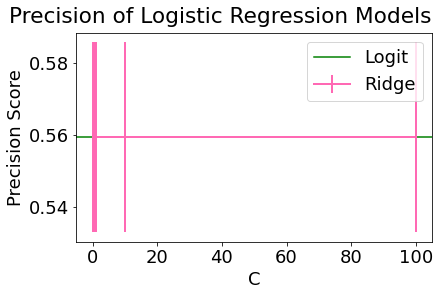

In [32]:
logreg_plot(X_over,y_over)

[[0.01975349 0.         1.         ... 0.         0.         0.        ]
 [0.01737584 0.         1.         ... 0.         0.         0.        ]
 [0.01872634 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]
[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]
[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]
[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]
[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]
[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]
[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]
[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]
[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 

C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.00475529 1.         1.         ... 0.         0.         0.        ]
 [0.1174272  0.         1.         ... 0.         0.         0.        ]
 [0.0153596  0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01975349 0.         1.         ... 0.         0.         0.        ]
 [0.01737584 0.         1.         ... 0.         0.         0.        ]
 [0.01872634 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.00475529 1.         1.         ... 0.         0.         0.        ]
 [0.1174272  0.         1.         ... 0.         0.         0.        ]
 [0.0153596  0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01975349 0.         1.         ... 0.         0.         0.        ]
 [0.01737584 0.         1.         ... 0.         0.         0.        ]
 [0.01872634 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.00475529 1.         1.         ... 0.         0.         0.        ]
 [0.1174272  0.         1.         ... 0.         0.         0.        ]
 [0.0153596  0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01975349 0.         1.         ... 0.         0.         0.        ]
 [0.01737584 0.         1.         ... 0.         0.         0.        ]
 [0.01872634 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.00475529 1.         1.         ... 0.         0.         0.        ]
 [0.1174272  0.         1.         ... 0.         0.         0.        ]
 [0.0153596  0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01975349 0.         1.         ... 0.         0.         0.        ]
 [0.01737584 0.         1.         ... 0.         0.         0.        ]
 [0.01872634 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.00475529 1.         1.         ... 0.         0.         0.        ]
 [0.1174272  0.         1.         ... 0.         0.         0.        ]
 [0.0153596  0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01975349 0.         1.         ... 0.         0.         0.        ]
 [0.01737584 0.         1.         ... 0.         0.         0.        ]
 [0.01872634 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02865539 0.         1.         ... 0.         0.         0.        ]
 [0.00679056 1.         1.         ... 0.         0.         0.        ]
 [0.05335438 0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.01351454 1.         1.         ... 0.         0.         0.        ]
 [0.00985297 1.         1.         ... 0.         0.         0.        ]
 [0.03625435 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.00475529 1.         1.         ... 0.         0.         0.        ]
 [0.1174272  0.         1.         ... 0.         0.         0.        ]
 [0.0153596  0.         1.         ... 0.         0.         0.        ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


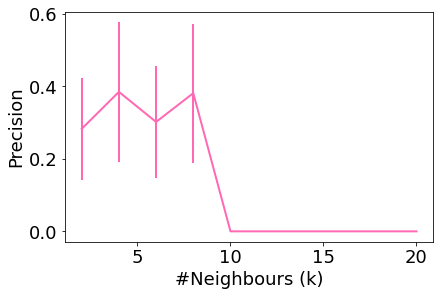

In [33]:
KNNcrossval(X_over,y_over)

## Random  Forest


In [8]:
undersampler = RandomUnderSampler(sampling_strategy='majority')

In [14]:
X_under, y_under = undersampler.fit_resample(X, y)
unique, counts = np.unique(y_under, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 26463]
 [    1 26463]]


In [15]:
def randomForest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
    grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
 
    grid_search_cv.fit(X_train, y_train)
    y_pred = grid_search_cv.predict(X_test)
    acc = accuracy_score( y_test, y_pred)
    best_estimator = grid_search_cv.best_estimator_
    acc_estimator = []
    acc_estimator.append(acc)
    acc_estimator.append(best_estimator)
    return acc_estimator    
 

In [19]:
forest_result = randomForest(X_under, y_under)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


In [23]:
forest_result


[0.5410920083128661,
 DecisionTreeClassifier(max_leaf_nodes=99, random_state=42)]

## Confusion Matrix

In [29]:
df_cm = [[115472, 2485],
         [6228, 388]]

Text(0.5, 15.0, 'Predicted label')

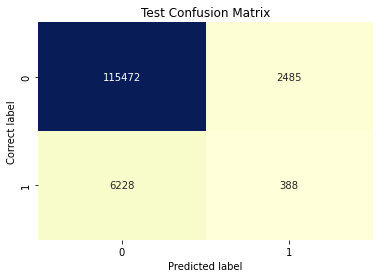

In [32]:
heatmap = sns.heatmap(df_cm, 
                       annot=True, 
                       fmt="d", 
                       cbar=False, 
                       cmap="YlGnBu")

plt.title('Test Confusion Matrix')
plt.ylabel('Correct label')
plt.xlabel('Predicted label')

In [33]:
df_cm = [[59364, 35002],
         [4001, 1291]]

Text(0.5, 15.0, 'Predicted label')

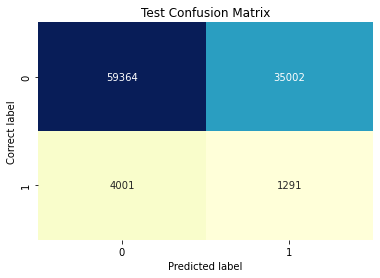

In [34]:
heatmap = sns.heatmap(df_cm, 
                       annot=True, 
                       fmt="d", 
                       cbar=False, 
                       cmap="YlGnBu")

plt.title('Test Confusion Matrix')
plt.ylabel('Correct label')
plt.xlabel('Predicted label')